In [24]:
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import torch.utils
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import cv2
import argparse
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
from PIL import Image
from sklearn.cluster import KMeans

In [92]:
features_path = Path("../data/interim/featurized.npy")
imgs_path = Path("../data/processed/djo_fed_aus/")

In [93]:
X = np.load(features_path)

In [115]:
km = KMeans(n_clusters=10)

In [133]:
n_clusters = [3, 5, 10, 15, 20]
scores = []
for k in n_clusters:
    km = KMeans(n_clusters=k)
    km.fit(X)
    score = silhouette_score(X, km.predict(X))
    scores.append(score)

In [137]:
best_k = n_clusters[np.argmin(scores)]

In [138]:
best_k

15

In [139]:
km = KMeans(n_clusters=best_k)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [140]:
preds = km.predict(X)

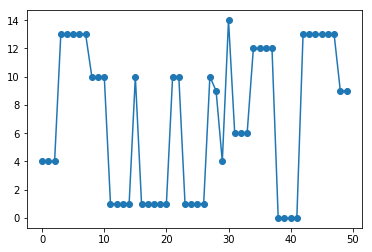

In [141]:
plt.plot(preds[1000:1050], marker='o')

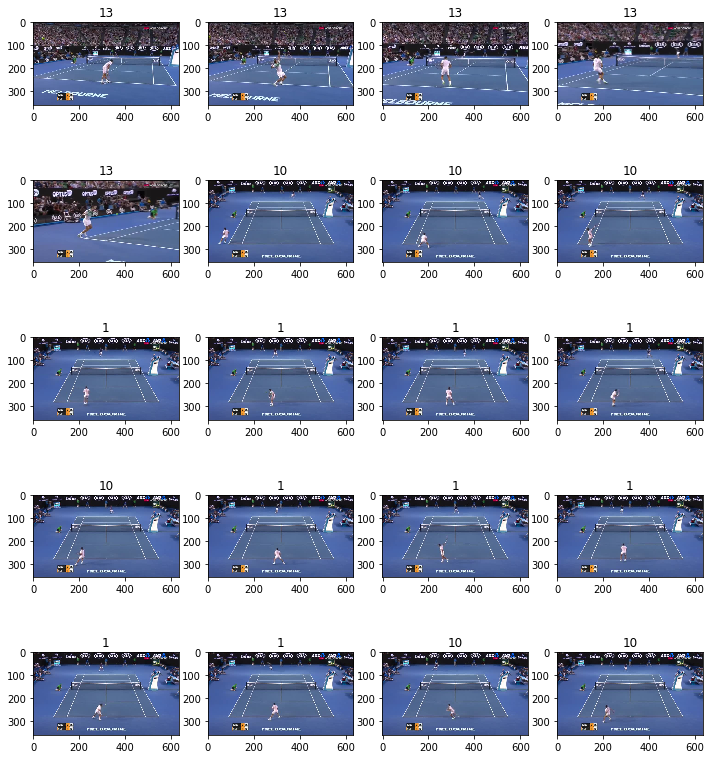

In [144]:
fig, axs = plt.subplots(5, 4, figsize=(12, 14))
idxs = np.arange(1003, 1100)
for i, ax in enumerate(axs.reshape(-1)):
    ax.imshow(Image.open(imgs_path / ("%05d.jpg" % (idxs[i] + 1))))
    ax.set_title(preds[idxs[i]])

In [145]:
from sklearn.decomposition import PCA

In [146]:
pca = PCA(n_components=10)

In [147]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [148]:
embeds = pca.transform(X)

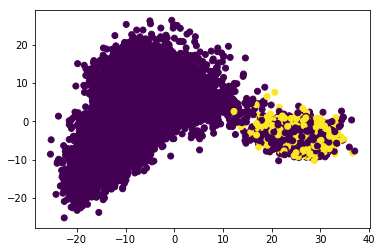

In [151]:
plt.scatter(embeds[:, 0], embeds[:, 1], c=preds==10)

In [91]:
pca.explained_variance_

array([295.42444 ,  92.99055 ,  68.24148 ,  42.89351 ,  36.775703,
        31.966501,  29.693928,  29.105803,  24.418497,  21.496754],
      dtype=float32)

(array([280., 391., 256., 174., 235., 444., 197., 366.,  74., 348., 159.,
        202., 166., 329., 417., 389., 101., 249., 132., 262., 324., 308.,
        354., 260., 232., 335., 312., 261., 202., 250.]),
 array([ 0.        ,  0.96666667,  1.93333333,  2.9       ,  3.86666667,
         4.83333333,  5.8       ,  6.76666667,  7.73333333,  8.7       ,
         9.66666667, 10.63333333, 11.6       , 12.56666667, 13.53333333,
        14.5       , 15.46666667, 16.43333333, 17.4       , 18.36666667,
        19.33333333, 20.3       , 21.26666667, 22.23333333, 23.2       ,
        24.16666667, 25.13333333, 26.1       , 27.06666667, 28.03333333,
        29.        ]),
 <a list of 30 Patch objects>)

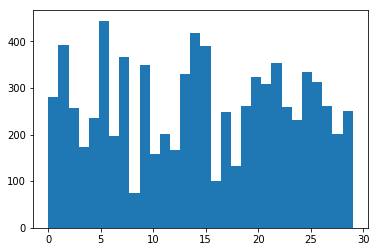

In [97]:
plt.hist(preds, bins=30)

In [75]:
idxs

array([   0,    7,   21, ..., 7997, 7998, 8002])

In [99]:
preds = km.predict(X)

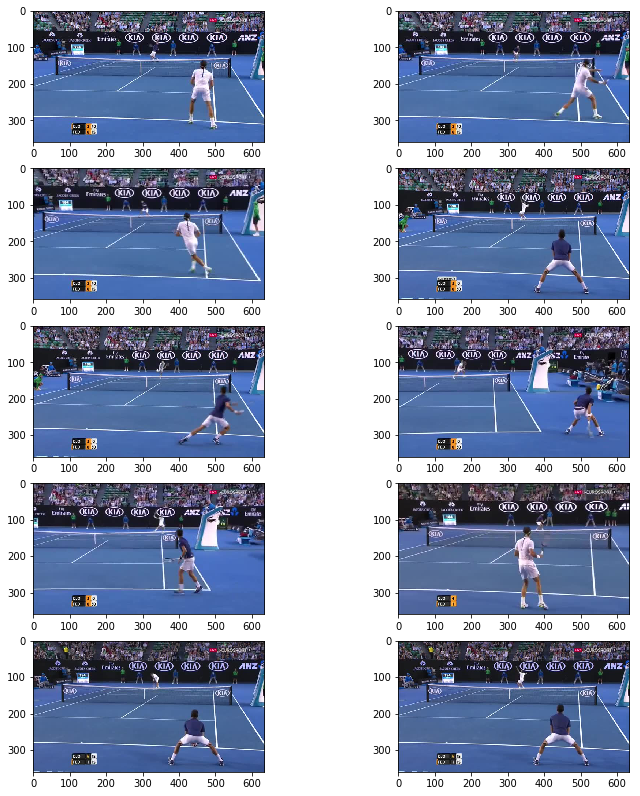

In [108]:
fig, axs = plt.subplots(5, 2, figsize=(12, 14))
idxs = np.where(preds == 18)[0][30:]
for i, ax in enumerate(axs.reshape(-1)):
    ax.imshow(Image.open(imgs_path / ("%05d.jpg" % (idxs[i] + 1))))